In [1]:
!pip install streamlit transformers torch sentencepiece
!npm install localtunnel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 34.7 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦
added 22 packages in 3s
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦npm notice
npm notice New major version of npm available! 10.8.2 -> 11.7.0
npm notice Changelog: https://github.com/npm/cli/releases/tag/v11.7.0
npm notice To update run: npm install -g npm@11.7.0
npm notice
⠦

In [2]:
%%writefile app.py
import streamlit as st
from transformers import pipeline

# 1. SETUP & MODEL LOADING
st.set_page_config(page_title="AI Translator", page_icon="🌐")

@st.cache_resource
def load_translator(direction):
    if direction == "de-en":
        return pipeline("translation", model="Helsinki-NLP/opus-mt-de-en")
    else:
        return pipeline("translation", model="Helsinki-NLP/opus-mt-en-de")

# 2. WEBSITE UI LAYOUT
st.title("🌐 Real-Time AI Translator")
st.write("Instant Neural Machine Translation powered by Hugging Face.")

# Sidebar
with st.sidebar:
    st.header("Settings")
    option = st.radio("Select Translation Direction:", ("German ➡ English", "English ➡ German"))

if option == "German ➡ English":
    source_lang = "🇩🇪 German"
    target_lang = "🇺🇸 English"
    model_key = "de-en"
else:
    source_lang = "🇺🇸 English"
    target_lang = "🇩🇪 German"
    model_key = "en-de"

# Load Model
with st.spinner(f"Loading {option} model..."):
    translator = load_translator(model_key)

# 3. TRANSLATION LOGIC
col1, col2 = st.columns(2)

with col1:
    st.subheader(f"Input ({source_lang})")
    source_text = st.text_area("Type here...", height=150)

with col2:
    st.subheader(f"Output ({target_lang})")
    if source_text:
        output = translator(source_text)
        translated_text = output[0]['translation_text']
        st.text_area("Result", value=translated_text, height=150, disabled=True)
    else:
        st.text_area("Result", value="", height=150, disabled=True)

Writing app.py


In [6]:
# 1. Install pyngrok (if not already installed)
!pip install pyngrok

# 2. Reset previous connections (Important!)
from pyngrok import ngrok
ngrok.kill()

# 3. Authenticate
# 👇👇👇 PASTE YOUR TOKEN BELOW INSIDE THE QUOTES 👇👇👇
NGROK_TOKEN = "387Jnjc5CoE1m3c1UXFToYIsaCd_5YSpZbgoEACPUapFSCY57"
ngrok.set_auth_token(NGROK_TOKEN)

# 4. Run Streamlit in the background
!streamlit run app.py &>/dev/null &

# 5. Create the tunnel
# Connect to port 8501 (where Streamlit runs)
try:
    public_url = ngrok.connect(8501).public_url
    print(f"🚀 Your App is live! Click here: {public_url}")
except Exception as e:
    print(f"Error: {e}")

🚀 Your App is live! Click here: https://nonviviparously-grimier-darleen.ngrok-free.dev


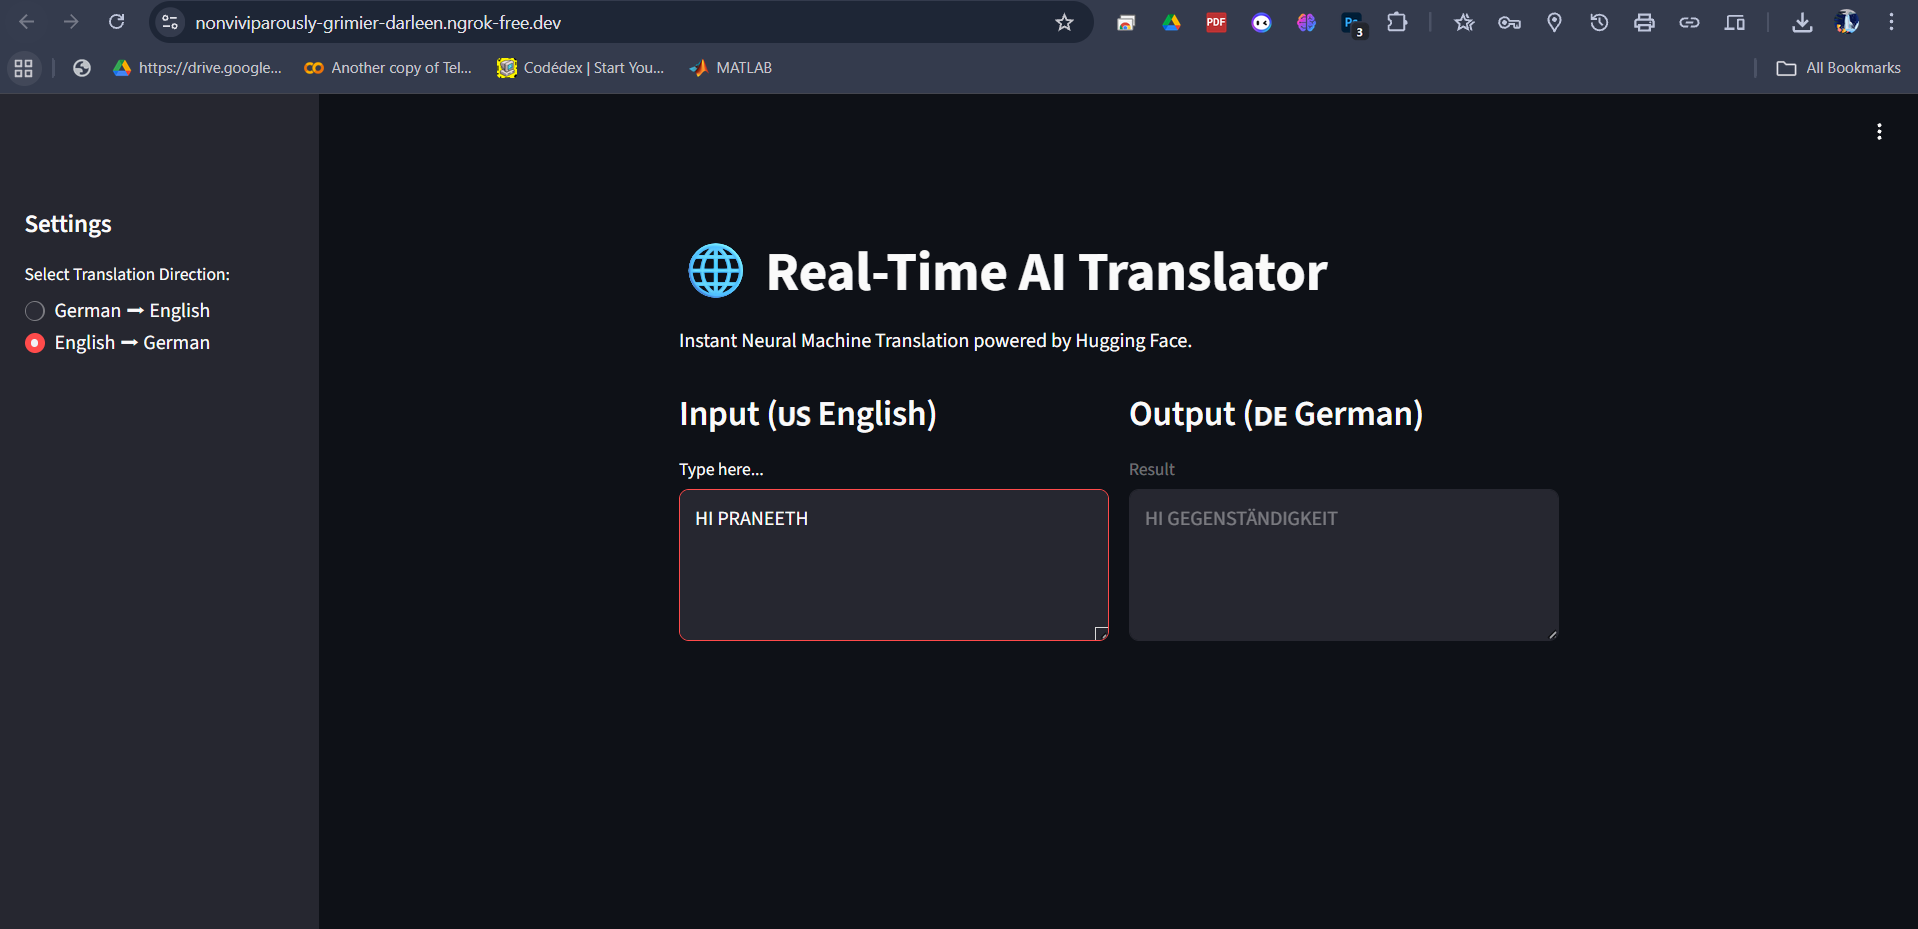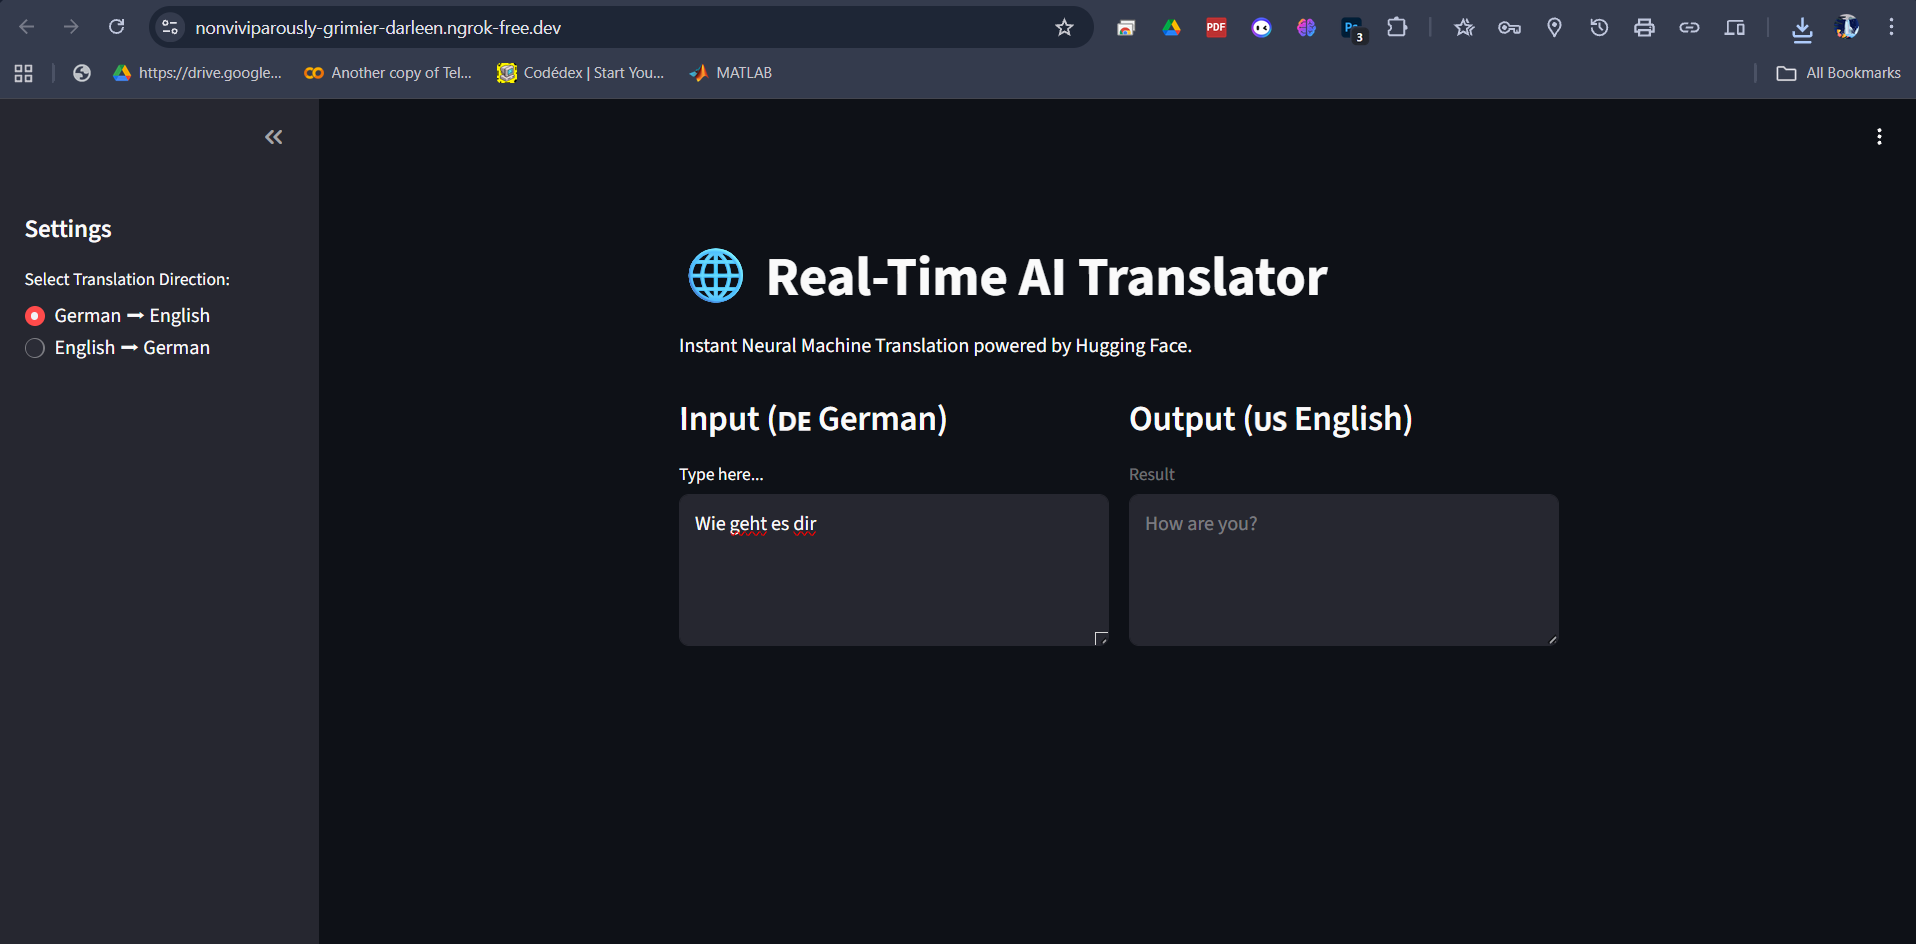